


1.   Sree Charan Reddy Gangireddy
2.   862327313
3.   sgang011@ucr.edu



In [7]:
from keras.datasets import mnist
import numpy as np
import pandas as pd
# Load MNIST dataset from Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images to 1D vectors
x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))

# Apply z-normalization to the training and test data
x_train = (x_train - np.mean(x_train)) / np.std(x_train)
x_test = (x_test - np.mean(x_train)) / np.std(x_train)

# Initialize binary classification labels
y_train = np.where(y_train > 4, 1, 0)
y_test = np.where(y_test > 4, 1, 0)

# Add bias variable by concatenating 1 to input
x_train = np.concatenate((x_train, np.ones((x_train.shape[0], 1))), axis=1)
x_test = np.concatenate((x_test, np.ones((x_test.shape[0], 1))), axis=1)


# 2nd Question: Linear Model

In [20]:
# Initialize the weights with Gaussian distribution
W = np.random.randn(785, 1) * np.sqrt(1/785)

# Training loop
learning_rate = 0.001
num_epochs = 10
batch_size = 10
num_batches = x_train.shape[0] // batch_size

for epoch in range(num_epochs):
    # Shuffle the data at the beginning of each epoch
    indices = np.arange(x_train.shape[0])
    np.random.shuffle(indices)
    x_train = x_train[indices]
    y_train = y_train[indices]
    
    # Mini-batch SGD
    for batch in range(num_batches):
        start = batch * batch_size
        end = (batch + 1) * batch_size
        X_batch = x_train[start:end]
        y_batch = y_train[start:end]
        
        # Forward pass
        y = np.dot(X_batch, W)
        y_pred = y - y_batch.reshape(-1,1)
        
        grad = np.dot(X_batch.T, y_pred)/batch_size 
        # Update the weights
        W -= learning_rate * grad
        
        if(batch % 100 == 0):
            # Compute the accuracy on the test set
            y_hat = np.dot(x_test, W)
            y_true = (y_hat > 0.5).astype(int)
            test_acc = np.mean(y_true == y_test)

    print("Epoch {}: Test accuracy = {:.2f}%".format(epoch+1, test_acc*100))

Epoch 1: Test accuracy = 49.71%
Epoch 2: Test accuracy = 49.81%
Epoch 3: Test accuracy = 49.63%
Epoch 4: Test accuracy = 49.76%
Epoch 5: Test accuracy = 49.75%
Epoch 6: Test accuracy = 49.69%
Epoch 7: Test accuracy = 49.71%
Epoch 8: Test accuracy = 49.77%
Epoch 9: Test accuracy = 49.78%
Epoch 10: Test accuracy = 49.78%


# 3rd Question: RELU activaiton with Quadratic loss

In [9]:
#Methods
def relu(x):
    return np.maximum(0, x)

# Define the hard-thresholding function for classification
def threshold(x):
    return (x > 0).astype(int)

# Define the quadratic loss function
def mse_loss(y, y_hat):
    return np.mean((y - y_hat) ** 2)

# Define Logistic loss
def logistic_loss(y, y_hat):
    return np.mean(-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

# Define the derivative of the ReLU activation function
def relu_derivative(x):
    return (x > 0).astype(int)

def xavier_init(in_dim, out_dim):
    xavier_stddev = np.sqrt(1 / (in_dim + out_dim))
    return np.random.normal(0, xavier_stddev, (in_dim, out_dim))

# Define the neural network classifier
class ShallowNeuralNet:
    def __init__(self, k, learning_rate):
        self.W = xavier_init(785, k)  # input layer weights
        self.v = xavier_init(k, 1)    # output layer weights
        self.lr = learning_rate       # learning rate

    def forward(self, x):
        hidden = relu(np.dot(x, self.W))  # hidden layer output 
        output = np.dot(hidden, self.v)   # output layer output
        return output

    def backward(self, x, y, y_hat):
        hidden = relu(np.dot(x, self.W))  # hidden layer output
        y = y.reshape((-1,1))
        output_error = (y_hat - y)
        hidden_x = np.dot(output_error, self.v.T) 
        hidden_y = relu_derivative(np.dot(x, self.W)) 
        hidden_error = hidden_x*hidden_y  # hidden layer error
        self.v -= self.lr * np.dot(hidden.T, output_error)  # update output layer weights
        self.W -= self.lr * np.dot(x.T, hidden_error)       # update input layer weights
        

    def train(self, X_train, y_train, X_test, y_test, num_epochs):
        num_batches = X_train.shape[0] // 10  # number of mini-batches
        train_acc_history = []
        test_acc_history = []
        iteration = []

        for epoch in range(num_epochs):
            # Shuffle the training data
            permutation = np.random.permutation(X_train.shape[0])
            X_train = X_train[permutation]
            y_train = y_train[permutation]

            for i in range(num_batches):
                #print(i)
                # Select a mini-batch
                start = i * 10
                end = (i + 1) * 10

                X_batch = X_train[start:end]
                y_batch = y_train[start:end]

                # Compute the forward pass
                y_hat = self.forward(X_batch)
                #print("forward Completed")
                # Compute the backward pass
                self.backward(X_batch, y_batch, y_hat)
                #print("backward Complete")

                if(i % 100 == 0):
                  train_acc = np.mean(threshold(y_hat) == y_train)
                  # iteration.append(i)
                  # print("train_acc calculated")
                  train_acc_history.append(train_acc)
                  # Compute the accuracy on the test set
                  test_acc = np.mean(threshold(self.forward(X_test)) == y_test)
                  if(i%1000 == 0):
                    print('Epoch %d, Iteration %d, Train accuracy = %f, Test accuracy = %f' % (epoch + 1, i,train_acc, test_acc))
                  # print("test_acc calculated")
                  test_acc_history.append(test_acc)
            print('Epoch %d, Train accuracy = %f, Test accuracy = %f' % (epoch + 1, train_acc, test_acc))

        return train_acc_history, test_acc_history  


Epoch 1, Iteration 0, Train accuracy = 0.509933, Test accuracy = 0.512429
Epoch 1, Iteration 1000, Train accuracy = 0.494040, Test accuracy = 0.499822
Epoch 1, Iteration 2000, Train accuracy = 0.490067, Test accuracy = 0.500600
Epoch 1, Iteration 3000, Train accuracy = 0.490067, Test accuracy = 0.503172
Epoch 1, Iteration 4000, Train accuracy = 0.494040, Test accuracy = 0.502421
Epoch 1, Iteration 5000, Train accuracy = 0.494040, Test accuracy = 0.501940
Epoch 1, Train accuracy = 0.492053, Test accuracy = 0.501918
Epoch 2, Iteration 0, Train accuracy = 0.492053, Test accuracy = 0.502249
Epoch 2, Iteration 1000, Train accuracy = 0.492053, Test accuracy = 0.502702
Epoch 2, Iteration 2000, Train accuracy = 0.494040, Test accuracy = 0.504423
Epoch 2, Iteration 3000, Train accuracy = 0.496027, Test accuracy = 0.502672
Epoch 2, Iteration 4000, Train accuracy = 0.496027, Test accuracy = 0.503870
Epoch 2, Iteration 5000, Train accuracy = 0.500000, Test accuracy = 0.503189
Epoch 2, Train accura

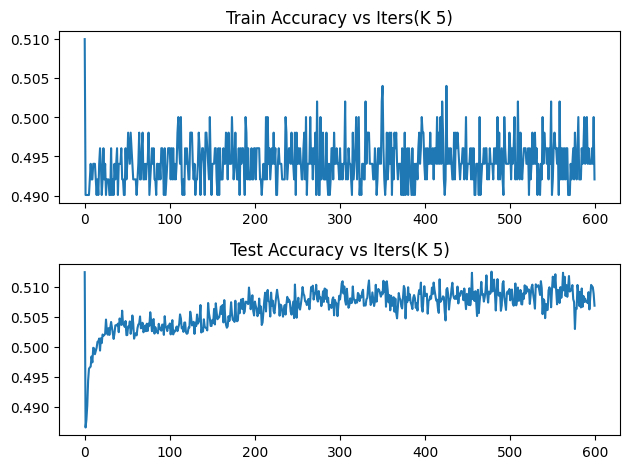

Epoch 1, Iteration 0, Train accuracy = 0.496027, Test accuracy = 0.491674
Epoch 1, Iteration 1000, Train accuracy = 0.494040, Test accuracy = 0.493762
Epoch 1, Iteration 2000, Train accuracy = 0.492053, Test accuracy = 0.494384
Epoch 1, Iteration 3000, Train accuracy = 0.494040, Test accuracy = 0.494076
Epoch 1, Iteration 4000, Train accuracy = 0.492053, Test accuracy = 0.493211
Epoch 1, Iteration 5000, Train accuracy = 0.492053, Test accuracy = 0.495293
Epoch 1, Train accuracy = 0.494040, Test accuracy = 0.495246
Epoch 2, Iteration 0, Train accuracy = 0.494040, Test accuracy = 0.495366
Epoch 2, Iteration 1000, Train accuracy = 0.500000, Test accuracy = 0.495596
Epoch 2, Iteration 2000, Train accuracy = 0.492053, Test accuracy = 0.495343
Epoch 2, Iteration 3000, Train accuracy = 0.490067, Test accuracy = 0.494668
Epoch 2, Iteration 4000, Train accuracy = 0.494040, Test accuracy = 0.496111
Epoch 2, Iteration 5000, Train accuracy = 0.494040, Test accuracy = 0.494401
Epoch 2, Train accura

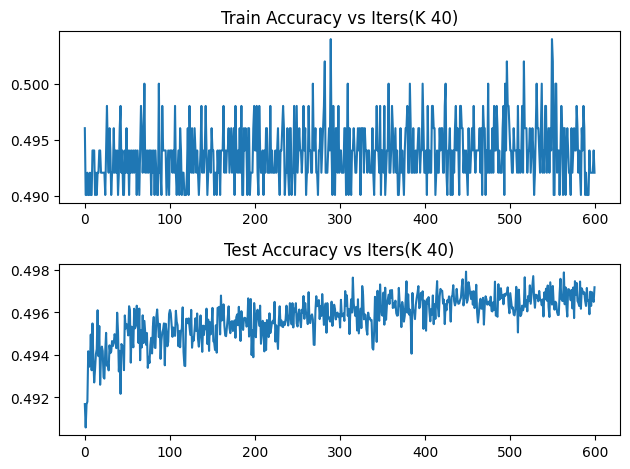

Epoch 1, Iteration 0, Train accuracy = 0.509933, Test accuracy = 0.488235
Epoch 1, Iteration 1000, Train accuracy = 0.490067, Test accuracy = 0.499169
Epoch 1, Iteration 2000, Train accuracy = 0.494040, Test accuracy = 0.496803
Epoch 1, Iteration 3000, Train accuracy = 0.492053, Test accuracy = 0.497823
Epoch 1, Iteration 4000, Train accuracy = 0.494040, Test accuracy = 0.497326
Epoch 1, Iteration 5000, Train accuracy = 0.490067, Test accuracy = 0.499185
Epoch 1, Train accuracy = 0.492053, Test accuracy = 0.498440
Epoch 2, Iteration 0, Train accuracy = 0.494040, Test accuracy = 0.498107
Epoch 2, Iteration 1000, Train accuracy = 0.494040, Test accuracy = 0.497798
Epoch 2, Iteration 2000, Train accuracy = 0.490067, Test accuracy = 0.498215
Epoch 2, Iteration 3000, Train accuracy = 0.490067, Test accuracy = 0.498179
Epoch 2, Iteration 4000, Train accuracy = 0.490067, Test accuracy = 0.498388
Epoch 2, Iteration 5000, Train accuracy = 0.496027, Test accuracy = 0.498499
Epoch 2, Train accura

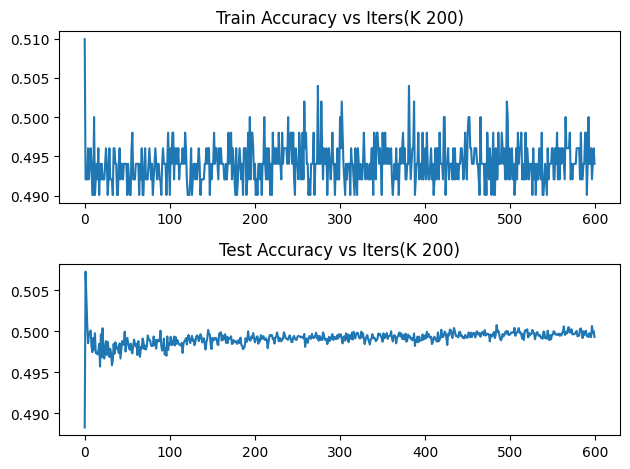

In [10]:
# Create an instance of the ShallowNeuralNet class
import matplotlib.pyplot as plt

for i in [5,40,200]:
    net = ShallowNeuralNet(i, learning_rate=0.001)

    # Train the neural network
    train_acc_history, test_acc_history = net.train(x_train, y_train, x_test, y_test, num_epochs=10)

    #Plotting
    y = train_acc_history
    z = test_acc_history

    fig, axs = plt.subplots(2,1)

    #Loss vs Iterations plot:
    axs[0].plot(y)
    axs[0].set_title(f"Train Accuracy vs Iters(K {i})")

    #Accuracy vs Iterations plot:
    axs[1].plot(z)
    axs[1].set_title(f'Test Accuracy vs Iters(K {i})')

    # plt.subplots_adjust(wspace=0.4)
    plt.tight_layout()

    plt.show()

# 4th Question: RELU + Sigmoid with Logistic loss

In [ ]:
#Methods
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the hard-thresholding function for classification
def threshold(x):
    return (x > 0).astype(int)

# Define Logistic loss
def logistic_loss(y, y_hat):
    return np.mean(-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

# Define the derivative of the ReLU activation function
def relu_derivative(x):
    return (x > 0).astype(int)

def xavier_init(in_dim, out_dim):
    xavier_stddev = np.sqrt(1 / (in_dim + out_dim))
    return np.random.normal(0, xavier_stddev, (in_dim, out_dim))

# Define the neural network classifier
class ShallowNeuralNet_Sigma:
    def __init__(self, k, learning_rate):
        self.W = xavier_init(785, k)  # input layer weights
        self.v = xavier_init(k, 1)    # output layer weights
        self.lr = learning_rate       # learning rate

    def forward(self, x):
        hidden = relu(np.dot(x, self.W))  # RELU activaiton
        output = sigmoid(np.dot(hidden, self.v))   # Sigmoid Activation
        # print(output, "Forward output")
        return output

    def backward(self, x, y, y_hat): #self.backward(X_batch, y_batch, y_hat)
        y_ = np.multiply(y.reshape(-1,1), (1 - 1/(1+np.exp(-y_hat))))
        y_hat_2 = np.multiply(1 - y.reshape(-1,1), 1/(1+np.exp(-y_hat)))
        output_error = y_hat_2 - y_
        hidden_x = np.matmul(output_error, self.v.T)
        hidden_y = relu_derivative(np.matmul(x, self.W))
        hidden_error = np.multiply(hidden_x, hidden_y)
        self.W -= self.lr * np.matmul(x.T, hidden_error )
        self.v -= self.lr * np.matmul(hidden_y.T, output_error)
        
    def train_sigma(self, X_train, y_train, X_test, y_test, num_epochs):
        num_batches = X_train.shape[0] // 10  # number of mini-batches
        train_acc_history = []
        test_acc_history = []

        for epoch in range(num_epochs):
            # Shuffle the training data
            permutation = np.random.permutation(X_train.shape[0])
            X_train = X_train[permutation]
            y_train = y_train[permutation]

            for i in range(num_batches):
                #print(i)
                # Select a mini-batch
                start = i * 10
                end = (i + 1) * 10

                X_batch = X_train[start:end]
                y_batch = y_train[start:end]

                # Compute the forward pass
                y_hat = self.forward(X_batch)
                #print("forward Completed")
                # Compute the backward pass
                self.backward(X_batch, y_batch, y_hat)
                #print("backward Complete")

                if(i % 100 == 0):
                  train_acc = np.mean(threshold(y_hat) == y_train)
                  # iteration.append(i)
                  # print("train_acc calculated")
                  train_acc_history.append(train_acc)
                  # Compute the accuracy on the test set
                  test_acc = np.mean(threshold(self.forward(X_test)) == y_test)
                  if(i%1000 == 0):
                    print('Epoch %d, Iteration %d, Train accuracy = %f, Test accuracy = %f' % (epoch + 1, i,train_acc, test_acc))
                  # print("test_acc calculated")
                  test_acc_history.append(test_acc)
            print('Epoch %d, Train accuracy = %f, Test accuracy = %f' % (epoch + 1, train_acc, test_acc))

        return train_acc_history, test_acc_history  


Epoch 1, Iteration 0, Train accuracy = 0.490067, Test accuracy = 0.486100


<ipython-input-13-1baf04844ca9>:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 1, Iteration 1000, Train accuracy = 0.490067, Test accuracy = 0.506944
Epoch 1, Iteration 2000, Train accuracy = 0.498013, Test accuracy = 0.507778
Epoch 1, Iteration 3000, Train accuracy = 0.501987, Test accuracy = 0.509346
Epoch 1, Iteration 4000, Train accuracy = 0.503973, Test accuracy = 0.508721
Epoch 1, Iteration 5000, Train accuracy = 0.505960, Test accuracy = 0.508860
Epoch 1, Train accuracy = 0.507947, Test accuracy = 0.508329
Epoch 2, Iteration 0, Train accuracy = 0.505960, Test accuracy = 0.508454
Epoch 2, Iteration 1000, Train accuracy = 0.509933, Test accuracy = 0.508093
Epoch 2, Iteration 2000, Train accuracy = 0.509933, Test accuracy = 0.508860
Epoch 2, Iteration 3000, Train accuracy = 0.503973, Test accuracy = 0.508523
Epoch 2, Iteration 4000, Train accuracy = 0.505960, Test accuracy = 0.508093
Epoch 2, Iteration 5000, Train accuracy = 0.505960, Test accuracy = 0.508426
Epoch 2, Train accuracy = 0.505960, Test accuracy = 0.508713
Epoch 3, Iteration 0, Train accura

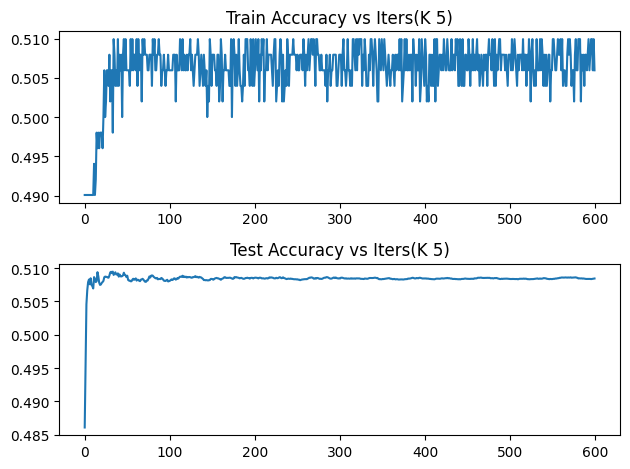

Epoch 1, Iteration 0, Train accuracy = 0.490067, Test accuracy = 0.486100
Epoch 1, Iteration 1000, Train accuracy = 0.490067, Test accuracy = 0.507297
Epoch 1, Iteration 2000, Train accuracy = 0.500000, Test accuracy = 0.508398
Epoch 1, Iteration 3000, Train accuracy = 0.503973, Test accuracy = 0.509182
Epoch 1, Iteration 4000, Train accuracy = 0.509933, Test accuracy = 0.508407
Epoch 1, Iteration 5000, Train accuracy = 0.505960, Test accuracy = 0.508785
Epoch 1, Train accuracy = 0.505960, Test accuracy = 0.508857
Epoch 2, Iteration 0, Train accuracy = 0.509933, Test accuracy = 0.508384
Epoch 2, Iteration 1000, Train accuracy = 0.509933, Test accuracy = 0.508796
Epoch 2, Iteration 2000, Train accuracy = 0.505960, Test accuracy = 0.508070
Epoch 2, Iteration 3000, Train accuracy = 0.505960, Test accuracy = 0.508540
Epoch 2, Iteration 4000, Train accuracy = 0.509933, Test accuracy = 0.508337
Epoch 2, Iteration 5000, Train accuracy = 0.501987, Test accuracy = 0.508031
Epoch 2, Train accura

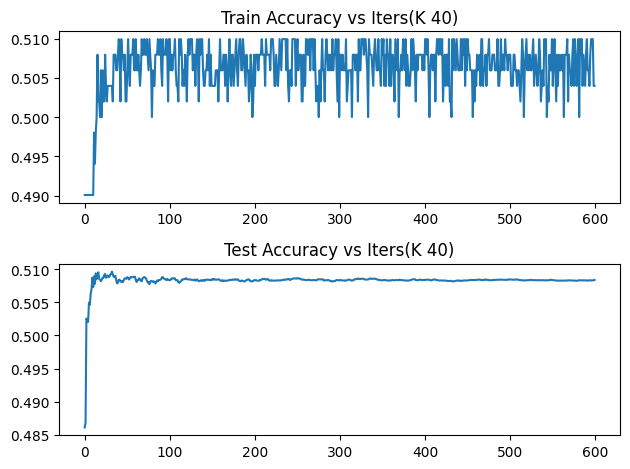

Epoch 1, Iteration 0, Train accuracy = 0.490067, Test accuracy = 0.486100
Epoch 1, Iteration 1000, Train accuracy = 0.501987, Test accuracy = 0.510161
Epoch 1, Iteration 2000, Train accuracy = 0.507947, Test accuracy = 0.507562
Epoch 1, Iteration 3000, Train accuracy = 0.505960, Test accuracy = 0.509335
Epoch 1, Iteration 4000, Train accuracy = 0.509933, Test accuracy = 0.508632
Epoch 1, Iteration 5000, Train accuracy = 0.503973, Test accuracy = 0.508051
Epoch 1, Train accuracy = 0.507947, Test accuracy = 0.508323
Epoch 2, Iteration 0, Train accuracy = 0.507947, Test accuracy = 0.508635
Epoch 2, Iteration 1000, Train accuracy = 0.507947, Test accuracy = 0.509380
Epoch 2, Iteration 2000, Train accuracy = 0.505960, Test accuracy = 0.508109
Epoch 2, Iteration 3000, Train accuracy = 0.509933, Test accuracy = 0.508448
Epoch 2, Iteration 4000, Train accuracy = 0.507947, Test accuracy = 0.508337
Epoch 2, Iteration 5000, Train accuracy = 0.507947, Test accuracy = 0.508498
Epoch 2, Train accura

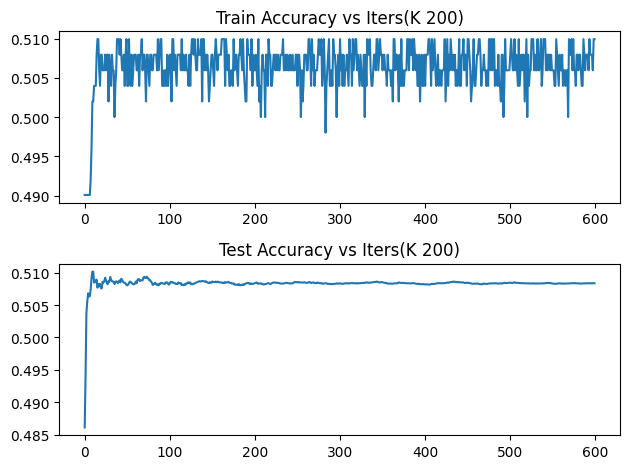

In [ ]:
# Create an instance of the ShallowNeuralNet class
import matplotlib.pyplot as plt

for i in [5,40,200]:
    net = ShallowNeuralNet_Sigma(i, learning_rate=0.001)

    # Train the neural network
    train_acc_history, test_acc_history = net.train_sigma(x_train, y_train, x_test, y_test, num_epochs=10)
    
    #Plotting
    y = train_acc_history
    z = test_acc_history

    fig, axs = plt.subplots(2,1)

    #Loss vs Iterations plot:
    axs[0].plot(y)
    axs[0].set_title(f"Train Accuracy vs Iters(K {i})")

    #Accuracy vs Iterations plot:
    axs[1].plot(z)
    axs[1].set_title(f'Test Accuracy vs Iters(K {i})')

    # plt.subplots_adjust(wspace=0.4)
    plt.tight_layout()

    plt.show()

# Linear VS Neural Network

Linear modes work by finding a linear relationship between the input features and the target variable. The weights of the linear model are adjusted during the training process to minimize the error between the predicted values and the actual target values.

In contrast, neural networks are more complex and powerful models that are based on interconnected nodes or neurons. Neural networks can learn non-linear relationships between the input features and the target variable. They have multiple layers of nodes and weights, and the weights are adjusted through backpropagation during the training process.

**Linear Model got an accuracy of around 48%** where as **Neural Network** achieved more than **51%**.

# Logistic loss vs Quadratic Loss activation function: 

Logistic loss, also known as cross-entropy loss, is typically used for binary classification tasks. It measures the difference between the predicted probabilities and the true labels. Logistic loss is a smooth and convex function, which makes it easier to optimize using gradient descent algorithms. However, logistic loss can be sensitive to outliers, and it can lead to overconfidence in predictions.

Quadratic loss, also known as mean squared error (MSE), is commonly used for regression tasks. It measures the difference between the predicted values and the true values. Quadratic loss is also a smooth and convex function, but it can be more sensitive to outliers than logistic loss. Quadratic loss can also lead to overfitting, especially when the input features are highly correlated.

In terms of test/train accuracy, logistic loss tends to perform better than quadratic loss for classification tasks, especially when dealing with imbalanced datasets.

In our classification the train/test accuracy of network with Logistic loss outperformed Quadratic loss by 2%. 

e